# Teste técnico QUOD - Análise Exploratória de Dados


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Usamos o parse_dates e o dayfirst=true a seguir, para forçar que a coluna seja do tipo datetime64, para continuar com a criação do gráfico

In [39]:
df = pd.read_csv("data_clean.csv", parse_dates=["Data"], dayfirst=True)

print(df.head())
print(df.dtypes)

   ID       Data      Produto         Categoria  Quantidade   Preço
0   1 2023-05-21  Micro-ondas  Eletrodomésticos           2  246.29
1   2 2023-02-22     Camiseta         Vestuário           4  112.79
2   3 2023-08-05  Micro-ondas  Eletrodomésticos           9  484.71
3   4 2023-04-30     Notebook       Eletrônicos           1  743.43
4   5 2023-04-12         Sofá            Móveis          10  371.65
ID                     int64
Data          datetime64[ns]
Produto               object
Categoria             object
Quantidade             int64
Preço                float64
dtype: object


C:\Users\thale\AppData\Local\Temp\ipykernel_30288\2522494123.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df = pd.read_csv("data_clean.csv", parse_dates=["Data"], dayfirst=True)


Como podemos ver, não tem a coluna de total de vendas, pois anteriormente ele foi apenas criado como uma coluna temporária, afim de não mudar o dataset limpo e sem modificações notáveis, então vamos ter que criar novamente de forma temporária a coluna de total de vendas.

In [40]:
df["Total_Venda"] = df["Quantidade"] * df["Preço"]

In [41]:
df.head()

,ID,Data,Produto,Categoria,Quantidade,Preço,Total_Venda
0,1,2023-05-21,Micro-ondas,Eletrodomésticos,2,246.29,492.58
1,2,2023-02-22,Camiseta,Vestuário,4,112.79,451.16
2,3,2023-08-05,Micro-ondas,Eletrodomésticos,9,484.71,4362.39
3,4,2023-04-30,Notebook,Eletrônicos,1,743.43,743.43
4,5,2023-04-12,Sofá,Móveis,10,371.65,3716.50


Crie um gráfico de linha mostrando a tendência de vendas ao longo do tempo, analisando os dados mensalmente.


Primeiro vamos converter a Data para tipo datetime e depois criar uma coluna apenas com o mês de cada produto

Depois vamos somar o total de vendas de cada mês, através disso podemos montar o nosso gráfico.

In [42]:
print("\nTipos de dados\n",df.dtypes)

print("\n", df.head())


Tipos de dados
 ID                      int64
Data           datetime64[ns]
Produto                object
Categoria              object
Quantidade              int64
Preço                 float64
Total_Venda           float64
dtype: object

    ID       Data      Produto         Categoria  Quantidade   Preço  \
0   1 2023-05-21  Micro-ondas  Eletrodomésticos           2  246.29   
1   2 2023-02-22     Camiseta         Vestuário           4  112.79   
2   3 2023-08-05  Micro-ondas  Eletrodomésticos           9  484.71   
3   4 2023-04-30     Notebook       Eletrônicos           1  743.43   
4   5 2023-04-12         Sofá            Móveis          10  371.65   

   Total_Venda  
0       492.58  
1       451.16  
2      4362.39  
3       743.43  
4      3716.50  


In [43]:
# Criar coluna com o nome do mês
df["Mes"] = df["Data"].dt.month  # retorna o número do mês (1 a 12)

# transformar o número em nome do mês
meses_nomes = {
    1: "Jan", 2: "Fev", 3: "Mar", 4: "Abr", 5: "Mai", 6: "Jun",
    7: "Jul", 8: "Ago", 9: "Set", 10: "Out", 11: "Nov", 12: "Dez"
}
df["Mes_Nome"] = df["Mes"].map(meses_nomes)

# Agrupar o total de vendas por mês
vendas_mensais = df.groupby("Mes_Nome")["Total_Venda"].sum().reset_index()

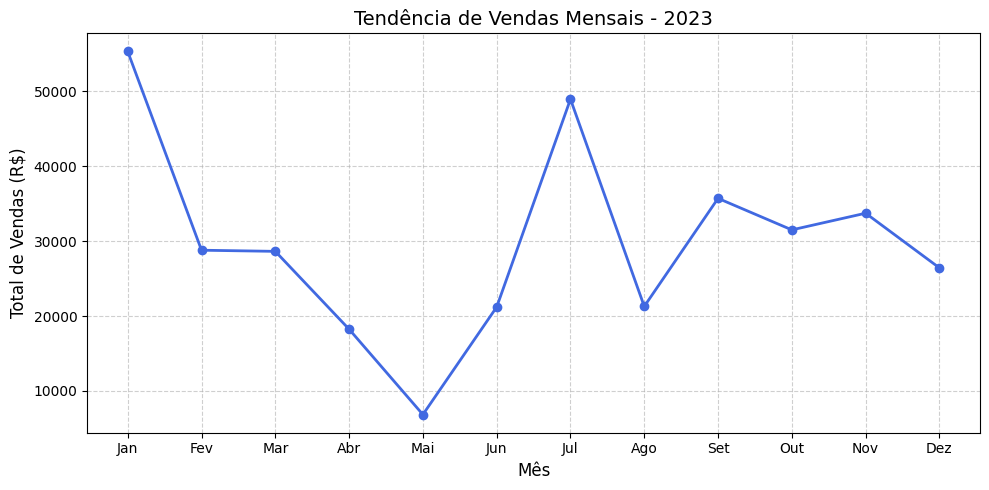

In [44]:
# Reordenar os meses na ordem cronológica
ordem_meses = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]
vendas_mensais["Mes_Nome"] = pd.Categorical(vendas_mensais["Mes_Nome"], categories=ordem_meses, ordered=True)
vendas_mensais = vendas_mensais.sort_values("Mes_Nome")

# Criar gráfico de linha
plt.figure(figsize=(10, 5))
plt.plot(vendas_mensais["Mes_Nome"], vendas_mensais["Total_Venda"], marker="o", linewidth=2, color="royalblue")

# Personalização
plt.title("Tendência de Vendas Mensais - 2023", fontsize=14)
plt.xlabel("Mês", fontsize=12)
plt.ylabel("Total de Vendas (R$)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

# Exibir o gráfico
plt.show()

### Insights

1° Insight

Como podemos ver no gráfico acima, no início do ano (Janeiro) e o meio do ano (Julho) apresentaram os maiores volumes de vendas.
Isso pode estar ligado a sazonalidade: em Janeiro, é comum haver compras após festas de fim de ano; já em Julho pode estar relacionado a promoções de meio de ano ou liquidações

2° Insight

Em Maio houve o menor volume de vendas, indicando um período de baixa demanda.

Isso mostra que podem ter políticas de promoções e/ou campanhas específicas para estimular o maior consumo nessa época, afim de melhorar as vendas durante esse mês. 